# Kolektor Surface Defect Detection
TMM4128 - Machine Learning for Engineers - Semestral Project


### Import TensorFlow

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
import tensorflow as tf

print("Number of GPUs: ", len(tf.config.list_physical_devices('GPU')))

Number of GPUs:  1


In [8]:
Categories = ["Undamaged", "Damaged"]
data_train = "./datasets/KolektorSDD2/train/"
data_test = "./datasets/KolektorSDD2/test/"
current_directory = os.getcwd()
print(current_directory)

flat_train = []
flat_train_GT = []
flat_test = []
flat_test_GT = []
damage_label_train = []
damage_label_test = []
img_name = []
X_train = []
X_test = []
y_train = []
y_test = []

c:\Users\lukasvi\Documents\GitHub\NTNU-ML-KolektorSDD2


In [9]:
#Create path to folder
path = data_train

#For-loop to go through all the contents in the folder
for img in os.listdir(path):
    #Distinguishing between Groundtruth pictures and Actual pictures
    if "GT" in img:
        img_array = cv2.imread(os.path.join(path,img))
        flat_train_GT.append(img_array.flatten())
        #If the GT Image is Black, no damage is detected
        if np.all(img_array == 0):
            y_train.append(0)
        else:
            y_train.append(1)
        #Mark GT images, if any defect is on them
    elif "GT" not in img:
        img2 = load_img(os.path.join(path,img), target_size = (231,636))
        img_array = img_to_array(img2)
        img_array /= 255.0
        X_train.append(img_array)

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)

(2332, 231, 636, 3)


In [11]:
#df_train = pd.DataFrame(flat_train)
#df_train["Damage"] = damage_label_train

#df_test = pd.DataFrame(flat_test)
#df_test["Damage"] = damage_label_test

In [12]:
#X_train = df_train.iloc[:, :-1]
#y_train = df_train.iloc[:, -1] 

#X_test = df_test.iloc[:, -1] 
#y_test = df_test.iloc[:, -1] 

In [13]:
print(X_train)

[[[[0.07450981 0.07843138 0.09019608]
   [0.07450981 0.07843138 0.09019608]
   [0.07450981 0.07843138 0.09019608]
   ...
   [0.16470589 0.16862746 0.16862746]
   [0.16470589 0.16862746 0.16862746]
   [0.16470589 0.16862746 0.16862746]]

  [[0.04313726 0.0627451  0.07450981]
   [0.04313726 0.0627451  0.07450981]
   [0.04313726 0.0627451  0.07450981]
   ...
   [0.21176471 0.20784314 0.21176471]
   [0.21176471 0.20784314 0.21176471]
   [0.21176471 0.20784314 0.21176471]]

  [[0.09019608 0.10980392 0.11764706]
   [0.09019608 0.10980392 0.11764706]
   [0.09019608 0.10980392 0.11764706]
   ...
   [0.18039216 0.16470589 0.19607843]
   [0.18039216 0.16470589 0.19607843]
   [0.18039216 0.16470589 0.19607843]]

  ...

  [[0.11764706 0.12941177 0.14901961]
   [0.11764706 0.12941177 0.14901961]
   [0.11764706 0.12941177 0.14901961]
   ...
   [0.09411765 0.11764706 0.12941177]
   [0.09411765 0.11764706 0.12941177]
   [0.09411765 0.11764706 0.12941177]]

  [[0.13333334 0.1254902  0.13333334]
   [0.1

In [14]:
# Reshape
X_train = X_train.reshape(-1,231,636,3)
X_test = X_test.reshape(-1,231,636,3)
print("x_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ",y_train.shape)

x_train shape:  (2332, 231, 636, 3)
X_test shape:  (0, 231, 636, 3)
y_train shape:  (2332,)


In [15]:
# Train - Test split

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=4)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_val shape",y_val.shape)

x_train shape (1632, 231, 636, 3)
x_val shape (700, 231, 636, 3)
y_train shape (1632,)
y_val shape (700,)


In [16]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (231,636,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "softmax"))

In [17]:
# Define the optimizer
# In neural networks, an optimizer is an algorithm used to adjust the weights and biases 
# of the network during training in order to minimize the loss function and improve the accuracy of the model.

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [18]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [19]:
epochs = 100  
batch_size = 250

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=6)

In [21]:
# Lets fit the model

history = model.fit(X_train, y_train,
                              epochs = epochs, validation_data = (X_val, y_val), steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[early_stopping])

Epoch 1/100
6/6 [==============================] - 9s 570ms/step - loss: 0.0000e+00 - accuracy: 0.1158 - val_loss: 0.0000e+00 - val_accuracy: 0.0829
Epoch 2/100
6/6 [==============================] - 2s 374ms/step - loss: 0.0000e+00 - accuracy: 0.1158 - val_loss: 0.0000e+00 - val_accuracy: 0.0829
Epoch 3/100
6/6 [==============================] - 2s 382ms/step - loss: 0.0000e+00 - accuracy: 0.1158 - val_loss: 0.0000e+00 - val_accuracy: 0.0829
Epoch 4/100
6/6 [==============================] - 2s 380ms/step - loss: 0.0000e+00 - accuracy: 0.1158 - val_loss: 0.0000e+00 - val_accuracy: 0.0829
Epoch 5/100
6/6 [==============================] - 2s 378ms/step - loss: 0.0000e+00 - accuracy: 0.1158 - val_loss: 0.0000e+00 - val_accuracy: 0.0829
Epoch 6/100
6/6 [==============================] - 2s 393ms/step - loss: 0.0000e+00 - accuracy: 0.1158 - val_loss: 0.0000e+00 - val_accuracy: 0.0829
Epoch 7/100
6/6 [==============================] - 2s 377ms/step - loss: 0.0000e+00 - accuracy: 0.1158 - v

In [22]:
print("Accuracy of the model is --> " , model.evaluate(X_val, y_val, batch_size=batch_size)[1]*100 , "%")
print("Loss of the model is --> " , model.evaluate(X_val, y_val, batch_size=batch_size)[0])

3/3 [==============================] - 1s 247ms/step - loss: 0.0000e+00 - accuracy: 0.0829
Accuracy of the model is -->  8.285713940858841 %
3/3 [==============================] - 1s 127ms/step - loss: 0.0000e+00 - accuracy: 0.0829
Loss of the model is -->  0.0


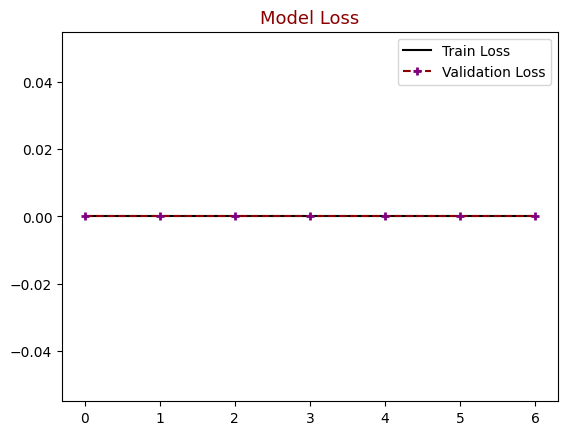

In [23]:
# Model Loss

plt.figure()
plt.plot(history.history["loss"],label = "Train Loss", color = "black")
plt.plot(history.history["val_loss"],label = "Validation Loss", color = "darkred", marker = "+", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

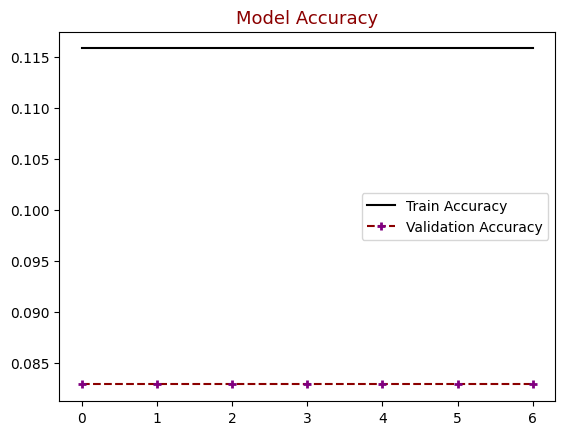

In [183]:
# Model Accuracy 

plt.figure()
plt.plot(history.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(history.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", marker = "+", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

In [184]:
import matplotlib

# We make predictions using the model we have created.
Y_pred = model.predict(X_val)
# argmax = To briefly mention it, it will give the index of the value with the highest value.
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

# We do the same for the y_val values. because we will compare these values. 
Y_true = np.argmax(y_val,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# plot the confusion matrix
f,ax = plt.subplots(figsize=(1, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label", color = "blue")
plt.ylabel("True Label", color = "green")
plt.title("Confusion Matrix", color = "darkred", size = 15)
plt.show()

22/22 [==============================] - 1s 23ms/step


AxisError: axis 1 is out of bounds for array of dimension 1